In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage
import csv
from skimage import img_as_float
from skimage import io, color, morphology

# Reading And Threshing the image

In [2]:
# point to license plate image (works well with custom crop function)
img = cv2.imread("13.jpg",0)
cv2.imshow("input", img)
cv2.waitKey(0)

gray = cv2.resize(img, None, fx = 1, fy = 1, interpolation = cv2.INTER_CUBIC)
blur = cv2.GaussianBlur(img, (5,5), 0)
cv2.imshow("Guass_blur image", blur)
cv2.waitKey(0)
gray = cv2.medianBlur(img, 3)
# perform otsu thresh (using binary inverse since opencv contours work better with white text)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
#Thresh_otsu : single intensity threshold that separate pixels into two classes, foreground and background
cv2.imshow("Thresh image", thresh)
cv2.waitKey(0)


-1

# Gradient , dilated image

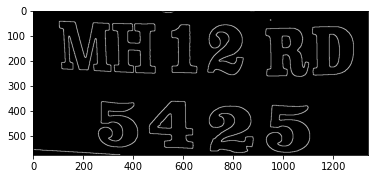

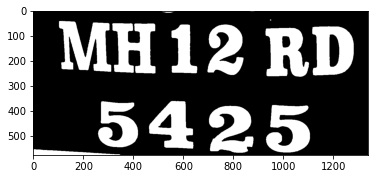

In [3]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
#cv2. MORPH_RECT to indicate that we want a rectangular structuring element
gradient=cv2.morphologyEx(thresh,cv2.MORPH_GRADIENT,kernel) # dilation and erosion of an image
plt.imshow(gradient,cmap='gray')
plt.show()
# apply dilation 
dilation = cv2.dilate(thresh, kernel, iterations = 1)
# Image dilation Increases the object area & decides the nature of operation
plt.imshow(dilation,cmap='gray')
#cv2.imshow("dilation", dilation)
plt.show()
# find contours

# finding and drawing the contours 

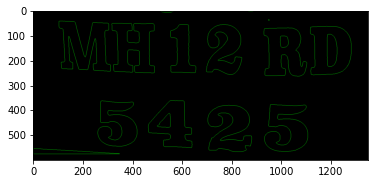

In [4]:
# find contours
try:
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
except:
    ret_img, contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# finds all the promising contour lines and reconstructs a full hierarchy of nested contours
sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

#drawing these contours
blank = np.zeros((600, 1350, 3), dtype='uint8')
cv2.drawContours(blank, contours ,-1, (0,255,0), 1)

plt.imshow(blank,cmap='gray')
plt.show()
#cv2.imshow("contours drawn", blank)
#cv2.waitKey(0)
#cv2.destroyAllWindows()'''

# ROI , Skeletanization & extracting individual characters 

roi_size: (20, 20)


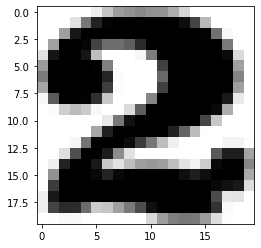

<class 'numpy.ndarray'>
skel_size: (35, 35)


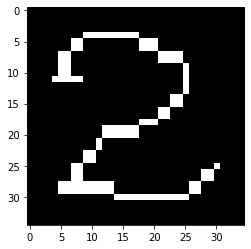

roi_size: (20, 20)


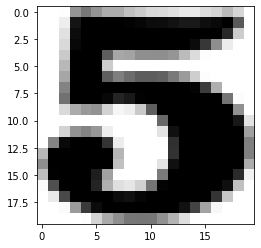

<class 'numpy.ndarray'>
skel_size: (35, 35)


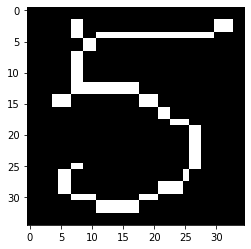

roi_size: (20, 20)


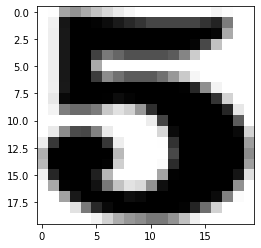

<class 'numpy.ndarray'>
skel_size: (35, 35)


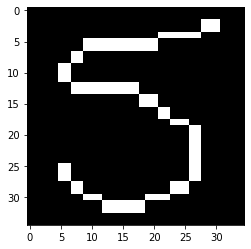

roi_size: (20, 20)


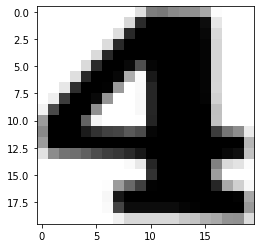

<class 'numpy.ndarray'>
skel_size: (35, 35)


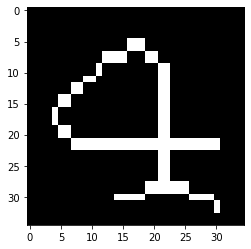

roi_size: (20, 20)


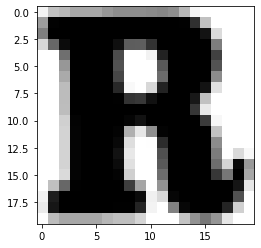

<class 'numpy.ndarray'>
skel_size: (35, 35)


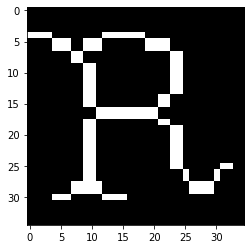

roi_size: (20, 20)


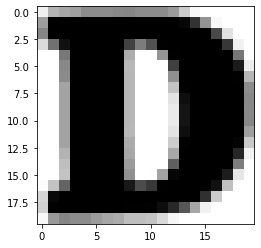

<class 'numpy.ndarray'>
skel_size: (35, 35)


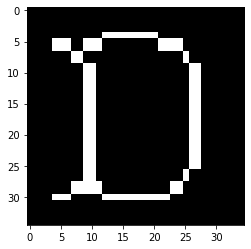

roi_size: (20, 20)


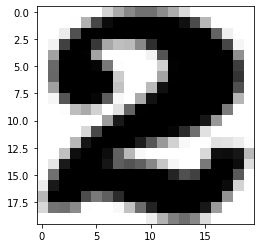

<class 'numpy.ndarray'>
skel_size: (35, 35)


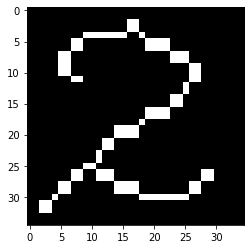

roi_size: (20, 20)


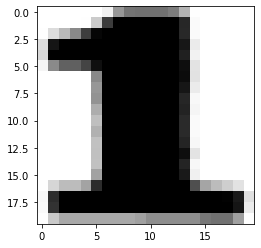

<class 'numpy.ndarray'>
skel_size: (35, 35)


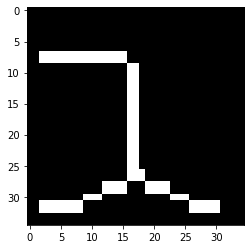

roi_size: (20, 20)


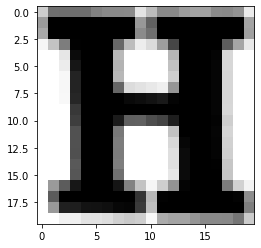

<class 'numpy.ndarray'>
skel_size: (35, 35)


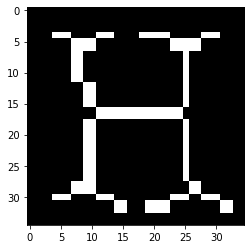

roi_size: (20, 20)


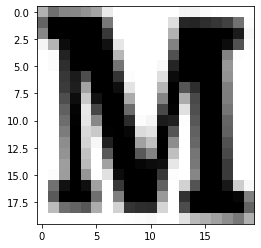

<class 'numpy.ndarray'>
skel_size: (35, 35)


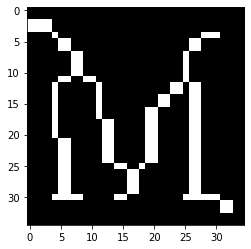

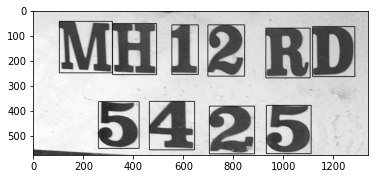

In [21]:
# create copy of image
from numpy import asarray
import sys
from skimage.exposure import histogram
from PIL import Image
im2 = gray.copy()

plate_num = ""
ROI_number = 0
# loop through contours and find letters in license plate
#retrieves only the extreme outer contours
# returns only the endpoints that are necessary for drawing the contour line`
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for cnt in cnts:
    x,y,w,h = cv2.boundingRect(cnt)
    height, width = im2.shape
    
    # if height of box is not a quarter of total height then skip
    #if height / float(h) > 12: continue
    if height / float(h) > 122: continue
    ratio = h / float(w)
    # if height to width ratio is less than 1.5 skip
    if ratio < 0.5: continue
    area = h * w
    # if width is not more than 25 pixels skip
    #if width / float(w) > 15: continue
    if width / float(w) > 125: continue
    # if area is less than 100 pixels skip
    if area < 800: continue
    # draw the rectangle
   # im2 = im2.resize((35,35))
    rect = cv2.rectangle(im2, (x,y), (x+w+5, y+h+5), (0,255,0),2)
    roi = thresh[y-5:y+h+5, x-5:x+w+5]
    #roi = thresh[y:y, x:x]
    roi = cv2.bitwise_not(roi) # flip the pixels value i.e black white to white - black
    roi = cv2.medianBlur(roi,5) # central pixel is replaced with this median value (Smoothing )
    
    roi = Image.fromarray(roi)
    roi=roi.resize((20,20),resample=3, box=None, reducing_gap=None)
    #roi.resize((50,50))
    print("roi_size:",roi.size)
    ROI_number = ROI_number + 1
    plt.imsave('extracted/skel_{}.png'.format(ROI_number), roi, cmap='gray')
    plt.imshow(roi, cmap='gray')
    plt.show()
    
    image = img_as_float(roi)
    #print(image)
    image_binary = image < 0.5
    out_skeletonize = morphology.skeletonize(image_binary)
    out_thin = morphology.thin(image_binary)
    print(type(out_thin))
    #print(out_thin)
    #array to image
    im = Image.fromarray(out_thin)
    im=im.resize((35,35),resample=5, box=None, reducing_gap=None)
    #print(im)
    print("skel_size:",im.size)
    plt.imshow(im)
    plt.show()
    plt.imsave('extracted/skel_{}.jpeg'.format(ROI_number), im, cmap='gray')
    
    #cv2.imwrite('tr_20X20/ROI_{}.png'.format(ROI_number),roi)
plt.imshow(im2, cmap='gray')
plt.show()

#  Normalization of each extracted characters

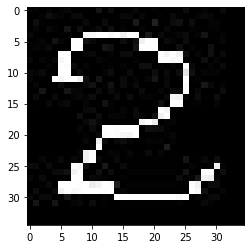

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(30, 30)


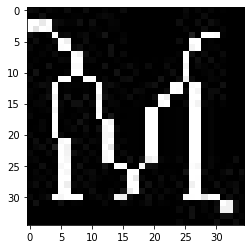

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(30, 30)


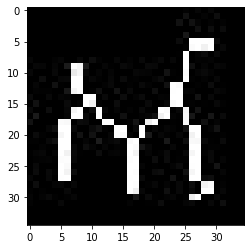

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(30, 30)


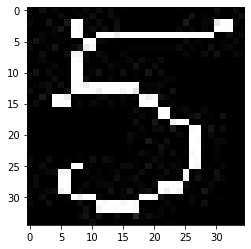

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(30, 30)


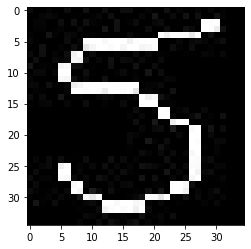

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(30, 30)


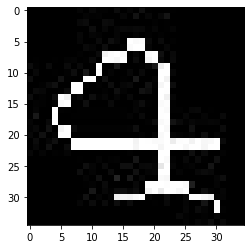

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(30, 30)


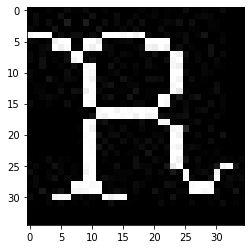

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(30, 30)


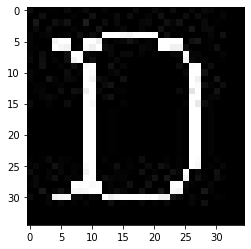

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(30, 30)


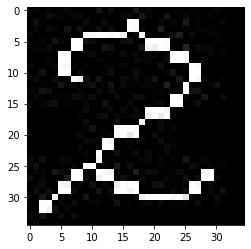

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(30, 30)


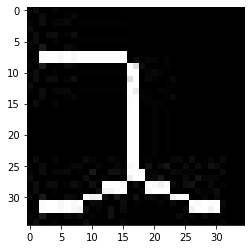

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(30, 30)


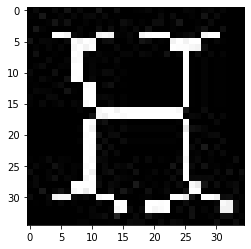

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(30, 30)


In [25]:
import glob
pl_img = []
y_arr =[]
for img in glob.glob("C://Users/shubh/OneDrive/Desktop/dumpy/extracted/*.jpeg"):
    n= cv2.imread(img,0)
    pl_img.append(n)
    im2arr = np.array(n)
    y_1d = im2arr.flatten()
    y_arr.append(y_1d)
    plt.imshow(n, cmap='gray')
    plt.show()
    
#normalization start
    min = sys.maxsize
    max = -sys.maxsize
    image = n.copy()
    image.resize((30,30))
    np_image = asarray(image)
    if min > np_image.min():
        min = np_image.min()
    if max < np_image.max():
        max = np_image.max()    
        
    np_image = np_image.astype('float32')
    #print("BEGINNING PIXEL VALUES", np_image)
    print('Data Type: %s' % np_image.dtype)
    print('Min: %.3f, Max: %.3f' % (np_image.min(), np_image.max()))
    np_image -= min
    np_image /= (max - min)
    print('Min: %.3f, Max: %.3f' % (np_image.min(), np_image.max()))
    #np.set_printoptions(threshold=np.inf)
    #print(np_image)
    print(np_image.shape)
    #print(np_image)
    '''Normalization end'''
    #sending pixels to csv
    value = np.asarray(np_image, dtype=None)
    value = value.flatten()  # get a copy of an given array collapsed into one dimension.
   # print(value)
    with open("csv/img_pixels.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)
    #normalization end    

In [34]:
arr = np.array(y_arr)
arr_1 = arr.flatten()
print(arr_1)

[ 2  4  0 ...  0 12  0]


# HOG feature extraction

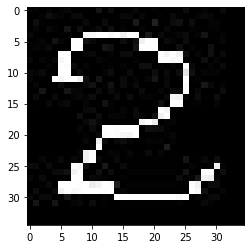

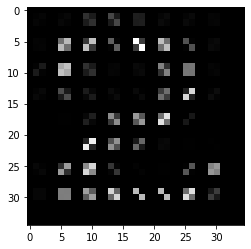

[0.0493737  0.         0.         ... 0.00425019 0.00793875 0.00385393]


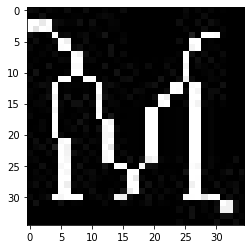

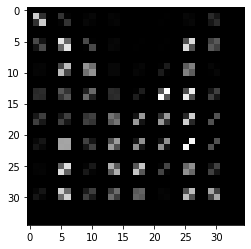

[0.00767146 0.         0.20613937 ... 0.17687743 0.31019486 0.26278017]


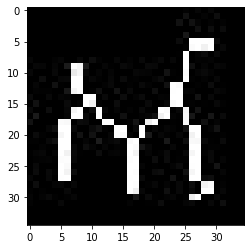

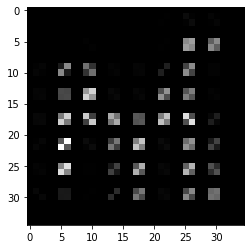

[0.         0.         0.         ... 0.00596851 0.29223944 0.13693362]


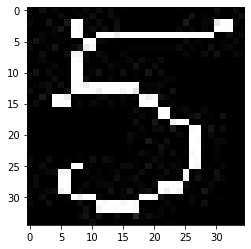

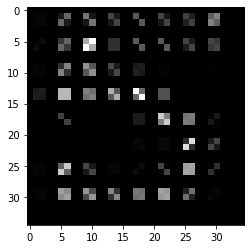

[0.07209853 0.         0.         ... 0.00415776 0.00415776 0.        ]


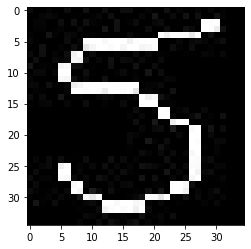

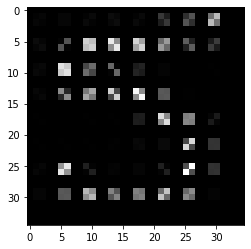

[0.06666286 0.12593807 0.07166961 ... 0.         0.0081344  0.00917413]


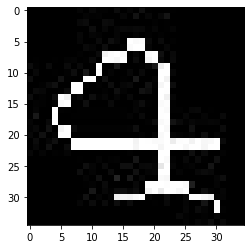

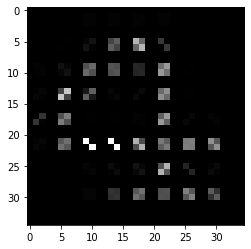

[0.         0.         0.         ... 0.31710094 0.01251221 0.00252785]


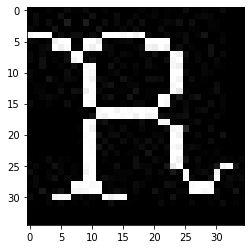

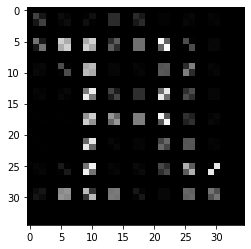

[0.01149638 0.         0.         ... 0.00718333 0.19320804 0.13266548]


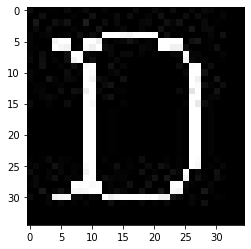

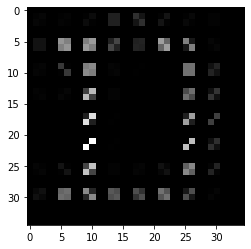

[0.02944588 0.04522928 0.03129892 ... 0.0041068  0.0041068  0.        ]


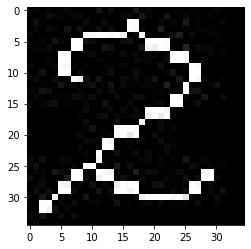

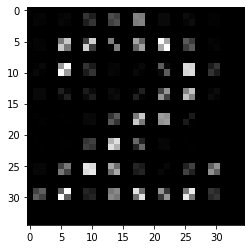

[0.04788565 0.         0.         ... 0.         0.00966141 0.16737676]


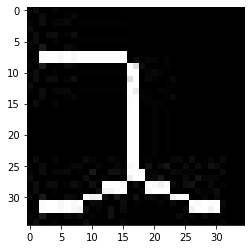

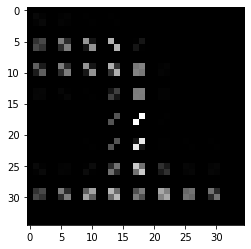

[0.05238942 0.         0.         ... 0.34412705 0.01367541 0.28069924]


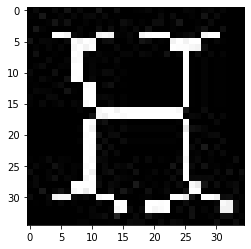

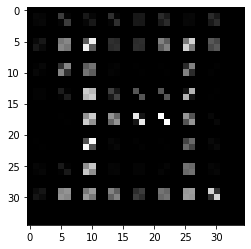

[0.07180182 0.00559875 0.         ... 0.18835494 0.28702661 0.27731918]


In [14]:
#fe ex with hog
from skimage.feature import hog
from skimage import data, color, exposure
import glob
pl_img = []
images = []
labels = []
for img in glob.glob("extracted/*.jpeg"):
    n= cv2.imread(img,0)
    pl_img.append(n)
    plt.imshow(n, cmap='gray')
    plt.show()
    
    #fd, hog_image = hog(n,orientations=1,pixels_per_cell=(8,8),cells_per_block=(3,3),block_norm='L2-Hys',visualize=False,transform_sqrt=False,feature_vector=True,multichannel=None)
    H, hog_image = hog(n, orientations=8, pixels_per_cell=(4,4),cells_per_block=(2, 2), visualize=True, multichannel=None, feature_vector=True)
    #plt.axis("off")
    hog_image = exposure.rescale_intensity(hog_image, out_range=(0, 255)).astype("uint8")
    plt.imshow(hog_image, cmap="gray")
    plt.show()
    #np.save('hog_features.npy',H) 
    print(H)
    # update the data and labels
    images.append(hog_image)
    labels.append(img)
    with open("csv/hog_fea.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(H)


In [15]:
print(labels)

['extracted\\skel_1.jpeg', 'extracted\\skel_10.jpeg', 'extracted\\skel_11.jpeg', 'extracted\\skel_2.jpeg', 'extracted\\skel_3.jpeg', 'extracted\\skel_4.jpeg', 'extracted\\skel_5.jpeg', 'extracted\\skel_6.jpeg', 'extracted\\skel_7.jpeg', 'extracted\\skel_8.jpeg', 'extracted\\skel_9.jpeg']


# Features extraction : [eccentricity  area   perimeter  euler_number  orientation  solidity]

<class 'list'>


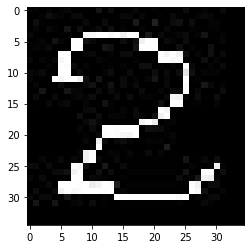

   eccentricity  area   perimeter  euler_number  orientation  solidity
0      0.508385   482  385.149278           -76     0.066522  0.475345
1      0.000000     1    0.000000             1     0.785398  1.000000
2      0.000000     1    0.000000             1     0.785398  1.000000
3      0.985171     4    2.414214             1    -0.392699  0.666667
4      0.000000     1    0.000000             1     0.785398  1.000000
5      0.000000     1    0.000000             1     0.785398  1.000000
   eccentricity  area   perimeter  euler_number  orientation  solidity
0      0.508385   482  385.149278           -76     0.066522  0.475345


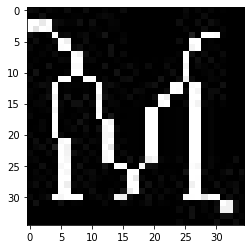

   eccentricity  area   perimeter  euler_number  orientation  solidity
0       0.56744   587  438.948268          -104     0.958010  0.517181
1       0.00000     1    0.000000             1     0.785398  1.000000
2       0.00000     1    0.000000             1     0.785398  1.000000
3       0.00000     1    0.000000             1     0.785398  1.000000
   eccentricity  area   perimeter  euler_number  orientation  solidity
0       0.56744   587  438.948268          -104      0.95801  0.517181


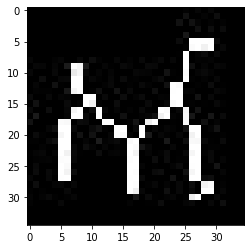

   eccentricity  area   perimeter  euler_number  orientation  solidity
0      0.643992   423  327.977705           -70    -1.259220  0.475816
1      0.522233     4    1.207107             1     1.570796  0.571429
   eccentricity  area   perimeter  euler_number  orientation  solidity
0      0.643992   423  327.977705           -70     -1.25922  0.475816


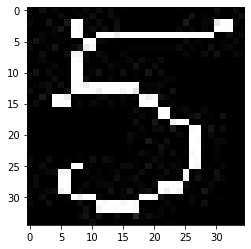

   eccentricity  area   perimeter  euler_number  orientation  solidity
0      1.000000     3    1.000000             1     0.000000   1.00000
1      0.551037   484  386.220346           -64     0.095783   0.42794
2      0.000000     1    0.000000             1     0.785398   1.00000
3      0.000000     1    0.000000             1     0.785398   1.00000
4      0.000000     1    0.000000             1     0.785398   1.00000
5      0.000000     1    0.000000             1     0.785398   1.00000
   eccentricity  area  perimeter  euler_number  orientation  solidity
0           1.0     3        1.0             1          0.0       1.0


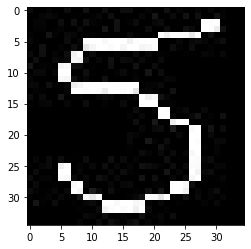

   eccentricity  area   perimeter  euler_number  orientation  solidity
0      0.000000     1    0.000000             1     0.785398  1.000000
1      0.573029   484  372.090404           -75     0.171026  0.448563
2      1.000000     2    0.000000             1     1.570796  1.000000
3      0.000000     1    0.000000             1     0.785398  1.000000
4      0.000000     1    0.000000             1     0.785398  1.000000
5      0.000000     1    0.000000             1     0.785398  1.000000
6      0.000000     1    0.000000             1     0.785398  1.000000
   eccentricity  area  perimeter  euler_number  orientation  solidity
0           0.0     1        0.0             1     0.785398       1.0


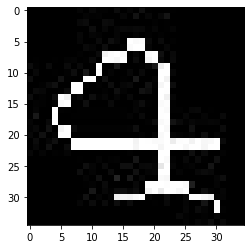

   eccentricity  area   perimeter  euler_number  orientation  solidity
0      0.686516   451  368.977705           -60     0.603677  0.500555
1      0.918245     5    4.621320             1    -0.270210  0.833333
   eccentricity  area   perimeter  euler_number  orientation  solidity
0      0.686516   451  368.977705           -60     0.603677  0.500555


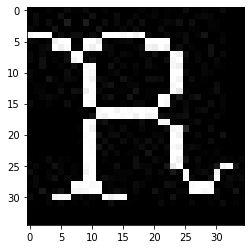

   eccentricity  area   perimeter  euler_number  orientation  solidity
0      0.481061   544  406.326948           -87     0.498062  0.512724
1      0.000000     1    0.000000             1     0.785398  1.000000
2      1.000000     2    0.000000             1     0.000000  1.000000
3      1.000000     3    1.000000             1     1.570796  1.000000
4      0.932214    10   10.035534             1    -0.077533  0.526316
5      0.000000     1    0.000000             1     0.785398  1.000000
6      1.000000     2    0.000000             1     0.000000  1.000000
7      1.000000     2    0.000000             1    -0.785398  1.000000
8      0.000000     1    0.000000             1     0.785398  1.000000
   eccentricity  area   perimeter  euler_number  orientation  solidity
0      0.481061   544  406.326948           -87     0.498062  0.512724


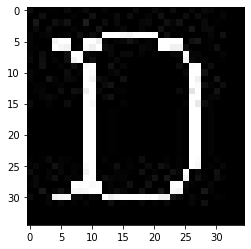

   eccentricity  area   perimeter  euler_number  orientation  solidity
0      0.000000     1    0.000000             1     0.785398  1.000000
1      0.375535   456  362.492424           -49     0.071678  0.451485
2      1.000000     2    0.000000             1     0.785398  1.000000
3      0.000000     1    0.000000             1     0.785398  1.000000
4      0.000000     1    0.000000             1     0.785398  1.000000
5      0.000000     1    0.000000             1     0.785398  1.000000
6      1.000000     2    0.000000             1    -0.785398  1.000000
   eccentricity  area  perimeter  euler_number  orientation  solidity
0           0.0     1        0.0             1     0.785398       1.0


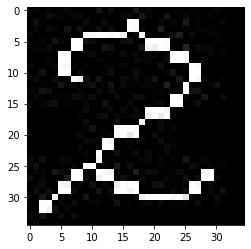

   eccentricity  area  perimeter  euler_number  orientation  solidity
0      0.502611   496  393.25588           -78    -0.185466  0.460539
1      0.000000     1    0.00000             1     0.785398  1.000000
2      0.000000     1    0.00000             1     0.785398  1.000000
3      1.000000     2    0.00000             1     0.785398  1.000000
   eccentricity  area  perimeter  euler_number  orientation  solidity
0      0.502611   496  393.25588           -78    -0.185466  0.460539


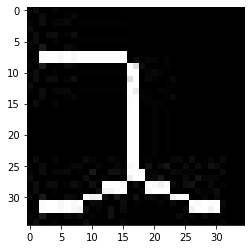

   eccentricity  area   perimeter  euler_number  orientation  solidity
0      0.973723     3    1.207107             1     0.491397  0.750000
1      0.000000     1    0.000000             1     0.785398  1.000000
2      0.995143    13   11.414214             1     1.535071  0.684211
3      0.708260   345  281.338095           -32     0.611702  0.395642
4      0.973723     3    1.207107             1    -0.491397  0.750000
5      0.000000     1    0.000000             1     0.785398  1.000000
6      0.973723     3    1.207107             1     0.491397  0.750000
7      0.000000     1    0.000000             1     0.785398  1.000000
8      0.948683     4    2.414214             1    -0.785398  0.800000
9      0.000000     1    0.000000             1     0.785398  1.000000
   eccentricity  area  perimeter  euler_number  orientation  solidity
0      0.973723     3   1.207107             1     0.491397      0.75


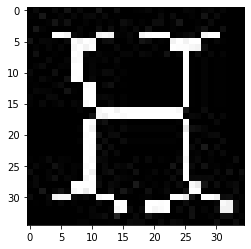

   eccentricity  area   perimeter  euler_number  orientation  solidity
0      0.537371   558  434.090404           -80     0.471148   0.48145
1      1.000000     3    1.000000             1     1.570796   1.00000
2      0.000000     1    0.000000             1     0.785398   1.00000
3      1.000000     2    0.000000             1    -0.785398   1.00000
   eccentricity  area   perimeter  euler_number  orientation  solidity
0      0.537371   558  434.090404           -80     0.471148   0.48145


In [8]:
# If your python version is not 3.x uncomment line below
#from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.measure import regionprops_table, label
import skimage.io as io
import cv2

import glob
fe_img = []
print(type(fe_img))
cnt = 0
for img in glob.glob("C://Users/shubh/OneDrive/Desktop/dumpy/extracted/*.jpeg"):
    n= cv2.imread(img,0)
    plt.imshow(n, cmap='gray')
    plt.show()

    image = np.asarray(n)
    labeled = label(image > 0)  # ensure input is binary
    data = regionprops_table(labeled,properties=('eccentricity','area', 'perimeter','euler_number','orientation','solidity'))
    #print(type(data))
    table = pd.DataFrame(data)
    #table_sorted_by_ecc = table.sort_values(by='eccentricity', ascending=False)
    # print e.g. the 10 most eccentric labels
    print(table)
    sortedtable = table.iloc[:1]
    #sortedtable.to_csv ('csv/fea_pixels.csv')
    #features = pd.DataFrame()
    print(sortedtable)
    fe_img.append(sortedtable)
    cnt = cnt + 1

In [9]:
fe_img

[   eccentricity  area   perimeter  euler_number  orientation  solidity
 0      0.508385   482  385.149278           -76     0.066522  0.475345,
    eccentricity  area   perimeter  euler_number  orientation  solidity
 0       0.56744   587  438.948268          -104      0.95801  0.517181,
    eccentricity  area   perimeter  euler_number  orientation  solidity
 0      0.643992   423  327.977705           -70     -1.25922  0.475816,
    eccentricity  area  perimeter  euler_number  orientation  solidity
 0           1.0     3        1.0             1          0.0       1.0,
    eccentricity  area  perimeter  euler_number  orientation  solidity
 0           0.0     1        0.0             1     0.785398       1.0,
    eccentricity  area   perimeter  euler_number  orientation  solidity
 0      0.686516   451  368.977705           -60     0.603677  0.500555,
    eccentricity  area   perimeter  euler_number  orientation  solidity
 0      0.481061   544  406.326948           -87     0.498062 

# Model Training using hog features and LinearSVC

In [55]:
#approach 1
# train Linear SVC 
from sklearn.svm import LinearSVC
from skimage import feature

from sklearn.model_selection import train_test_split
print('Training on train images...')
print(arr_1)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(images, arr_1, test_size=0.5, shuffle=False)


svm_model = LinearSVC(random_state=42)
svm_model.fit(hog_image, n)


# Now predict the value of the digit on the second half:
#expected = target[n_samples / 2:]
#predicted = classifier.predict(data[n_samples / 2:])
#print("expected")
#print("predicted")

Training on train images...
[ 2  4  0 ...  0 12  0]


# Model Training using SVM

In [28]:
# approach 2
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from skimage.io import imread
from skimage.filters import threshold_otsu
from sklearn.model_selection import train_test_split

letters = [
            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
            'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z'
        ]

def read_training_data(training_directory):
    image_data = []
    target_data = []
    for each_letter in letters:
        for each in range(10):
           # image_path = os.path.join(training_directory, each_letter, each_letter + '_' + str(each) + '.jpg')
            for img in glob.glob("C://Users/shubh/OneDrive/Desktop/dumpy/extracted/*.png"):
                image_path = img
                # read each image of each character
                #img_details = data.imread(image_path, 0)
                img_details = io.imread(image_path, as_gray=True)
                # converts each character image to binary image
                binary_image = img_details < threshold_otsu(img_details)
                    # the 2D array of each image is flattened because the machine learning
                    # classifier requires that each sample is a 1D array
                    # therefore the 20*20 image becomes 1*400
                    # in machine learning terms that's 400 features with each pixel
                    # representing a feature
                flat_bin_image = binary_image.reshape(-1)
                image_data.append(flat_bin_image)
                target_data.append(each_letter)

    return (np.array(image_data), np.array(target_data))

def cross_validation(model, num_of_fold, train_data, train_label):
    # this uses the concept of cross validation to measure the accuracy
    # of a model, the num_of_fold determines the type of validation
    # e.g if num_of_fold is 4, then we are performing a 4-fold cross validation
    # it will divide the dataset into 4 and use 1/4 of it for testing
    # and the remaining 3/4 for the training
    accuracy_result = cross_val_score(model, train_data, train_label,
                                      cv=num_of_fold)
    print("Cross Validation Result for ", str(num_of_fold), " -fold")

    print(accuracy_result * 100)


# current_dir = os.path.dirname(os.path.realpath(__file__))
#
# training_dataset_dir = os.path.join(current_dir, 'train')
print('reading data')
training_dataset_dir = 'extracted/img_20X20'
image_data, target_data = read_training_data(training_dataset_dir)
print('reading data completed')

# the kernel can be 'linear', 'poly' or 'rbf'
# the probability was set to True so as to show
# how sure the model is of it's prediction
svc_model = SVC(kernel='linear', probability=True)

cross_validation(svc_model, 4, image_data, target_data)

print('training model')

# let's train the model with all the input data
svc_model.fit(image_data, target_data)

reading data
reading data completed
Cross Validation Result for  4  -fold
[2.88770053 2.78074866 2.78074866 2.88770053]
training model


SVC(kernel='linear', probability=True)